# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
# Imports

from unityagents import UnityEnvironment

import os
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

from ddpg_agent import Agent

from collections import deque

%matplotlib inline

In [2]:
env = UnityEnvironment(file_name='Data/Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]

In [4]:
# Create the agent
agent = Agent(state_size=env_info.vector_observations.shape[1], action_size=brain.vector_action_space_size, 
              num_agents=len(env_info.agents))

def ddpg(n_episodes=800, max_t=1000):

    # Mean scores for each episodes
    scores = []
    # Mean scores for last 100 episodes
    scores_windows = deque(maxlen=100)
    
    # For each episode
    for i_episode in range(1, n_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent.reset()
        score = np.zeros(len(env_info.agents))
        
        # For each timestep
        for step in range(max_t):
            actions = agent.act(states)                                  # Select action for each agent
            env_info = env.step(actions)[brain_name]                     # Send actions to environment
            next_states = env_info.vector_observations                   # Get next states
            rewards = env_info.rewards                                   # Get rewards
            dones = env_info.local_done                                  # Get dones
             
            agent.step(states, actions, rewards, next_states, dones)     # take action and learn
            score += rewards                                             # add rewards
            states = next_states
            
            if np.any(dones):                                        
                break                                                     # If any episode ends, break the loop
        scores_windows.append(np.mean(score))
        scores.append(np.mean(score))
        
        print(f"Episode: {i_episode}\tAverage score: {np.mean(scores_windows):.2f}\tScore: {np.mean(score):.2f}")
                
        if np.mean(scores_windows) > 30:  # If the score of 30 is reached in last 100 episodes it's finish
            print(f"Environment solved in {i_episode} episodes.\tAverage score is {np.mean(scores_windows):.2f}")
            agent.save_models()
            break
    return scores
        
scores = ddpg()

Episode: 1	Average score: 0.82	Score: 0.82
Episode: 2	Average score: 0.84	Score: 0.86
Episode: 3	Average score: 0.83	Score: 0.80
Episode: 4	Average score: 0.79	Score: 0.67
Episode: 5	Average score: 0.78	Score: 0.77
Episode: 6	Average score: 0.86	Score: 1.23
Episode: 7	Average score: 0.89	Score: 1.08
Episode: 8	Average score: 0.93	Score: 1.17
Episode: 9	Average score: 0.95	Score: 1.12
Episode: 10	Average score: 0.97	Score: 1.14
Episode: 11	Average score: 0.98	Score: 1.08
Episode: 12	Average score: 0.99	Score: 1.12
Episode: 13	Average score: 1.00	Score: 1.09
Episode: 14	Average score: 1.01	Score: 1.16
Episode: 15	Average score: 1.02	Score: 1.11
Episode: 16	Average score: 1.02	Score: 1.06
Episode: 17	Average score: 1.03	Score: 1.17
Episode: 18	Average score: 1.05	Score: 1.41
Episode: 19	Average score: 1.09	Score: 1.88
Episode: 20	Average score: 1.11	Score: 1.51
Episode: 21	Average score: 1.14	Score: 1.60
Episode: 22	Average score: 1.16	Score: 1.60
Episode: 23	Average score: 1.18	Score: 1.

Episode: 183	Average score: 20.79	Score: 37.19
Episode: 184	Average score: 21.09	Score: 36.48
Episode: 185	Average score: 21.33	Score: 32.47
Episode: 186	Average score: 21.63	Score: 36.77
Episode: 187	Average score: 21.91	Score: 35.35
Episode: 188	Average score: 22.19	Score: 36.25
Episode: 189	Average score: 22.48	Score: 36.63
Episode: 190	Average score: 22.78	Score: 37.75
Episode: 191	Average score: 23.03	Score: 34.19
Episode: 192	Average score: 23.29	Score: 34.34
Episode: 193	Average score: 23.58	Score: 37.41
Episode: 194	Average score: 23.85	Score: 36.67
Episode: 195	Average score: 24.13	Score: 37.72
Episode: 196	Average score: 24.43	Score: 37.78
Episode: 197	Average score: 24.71	Score: 37.82
Episode: 198	Average score: 24.97	Score: 35.65
Episode: 199	Average score: 25.23	Score: 37.14
Episode: 200	Average score: 25.49	Score: 38.38
Episode: 201	Average score: 25.76	Score: 37.94
Episode: 202	Average score: 26.01	Score: 36.10
Episode: 203	Average score: 26.28	Score: 37.49
Episode: 204	

In [5]:
env.close()

## Plot the scores

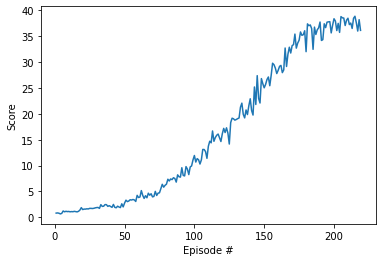

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.xlabel('Episode #')
plt.ylabel('Score')
plt.show()

## Let's play the agent

In [1]:
from unityagents import UnityEnvironment

import os
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

from ddpg_agent import Agent

from collections import deque

%matplotlib inline

LR_ACTOR = 1e-3         # learning rate of the actor 
LR_CRITIC = 1e-4        # learning rate of the critic

env = UnityEnvironment(file_name='Data/Reacher_Linux/Reacher.x86_64')

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=False)[brain_name]
states = env_info.vector_observations

# Create a new agent
agent_runner = Agent(state_size=env_info.vector_observations.shape[1], action_size=brain.vector_action_space_size, 
              num_agents=len(env_info.agents))
agent_runner.load_models()

score = []
while True:
    actions = agent_runner.act(states, add_noise=False)
    env_info = env.step(actions)[brain_name]
    states = env_info.vector_observations
    rewards = rewards = env_info.rewards
    score.append(rewards)
    dones = env_info.local_done 
    if np.any(dones):
        break
env.close()

print(f"Total score: {np.mean(score)}")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


... Loading checkpoint ...
... Loading checkpoint ...
... Loading checkpoint ...
... Loading checkpoint ...
Total score: 0.03895054857993683


In [6]:
agent_runner.critic

CriticNetwork(
  (fc1): Linear(in_features=33, out_features=42, bias=True)
  (fc2): Linear(in_features=46, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=1, bias=True)
  (relu): ReLU()
  (bn0): LayerNorm(torch.Size([33]), eps=1e-05, elementwise_affine=True)
  (bn1): LayerNorm(torch.Size([42]), eps=1e-05, elementwise_affine=True)
  (bn2): LayerNorm(torch.Size([300]), eps=1e-05, elementwise_affine=True)
)

In [7]:
agent_runner.actor

ActorNetwork(
  (fc1): Linear(in_features=33, out_features=42, bias=True)
  (fc2): Linear(in_features=42, out_features=300, bias=True)
  (bn0): LayerNorm(torch.Size([33]), eps=1e-05, elementwise_affine=True)
  (bn1): LayerNorm(torch.Size([42]), eps=1e-05, elementwise_affine=True)
  (bn2): LayerNorm(torch.Size([300]), eps=1e-05, elementwise_affine=True)
  (mu): Linear(in_features=300, out_features=4, bias=True)
)